/tmp/ipykernel_3112172/2976210256.py:59: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  mpatches.Patch(color='#808080', label=r'$\mathit{T}_\mathrm{opt}$', linewidth=0.5, edgecolor='black'),
/tmp/ipykernel_3112172/2976210256.py:60: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  mpatches.Patch(color='#3D5488', label=r'$\mathit{T}_\mathrm{m}$', linewidth=0.5, edgecolor='black'),


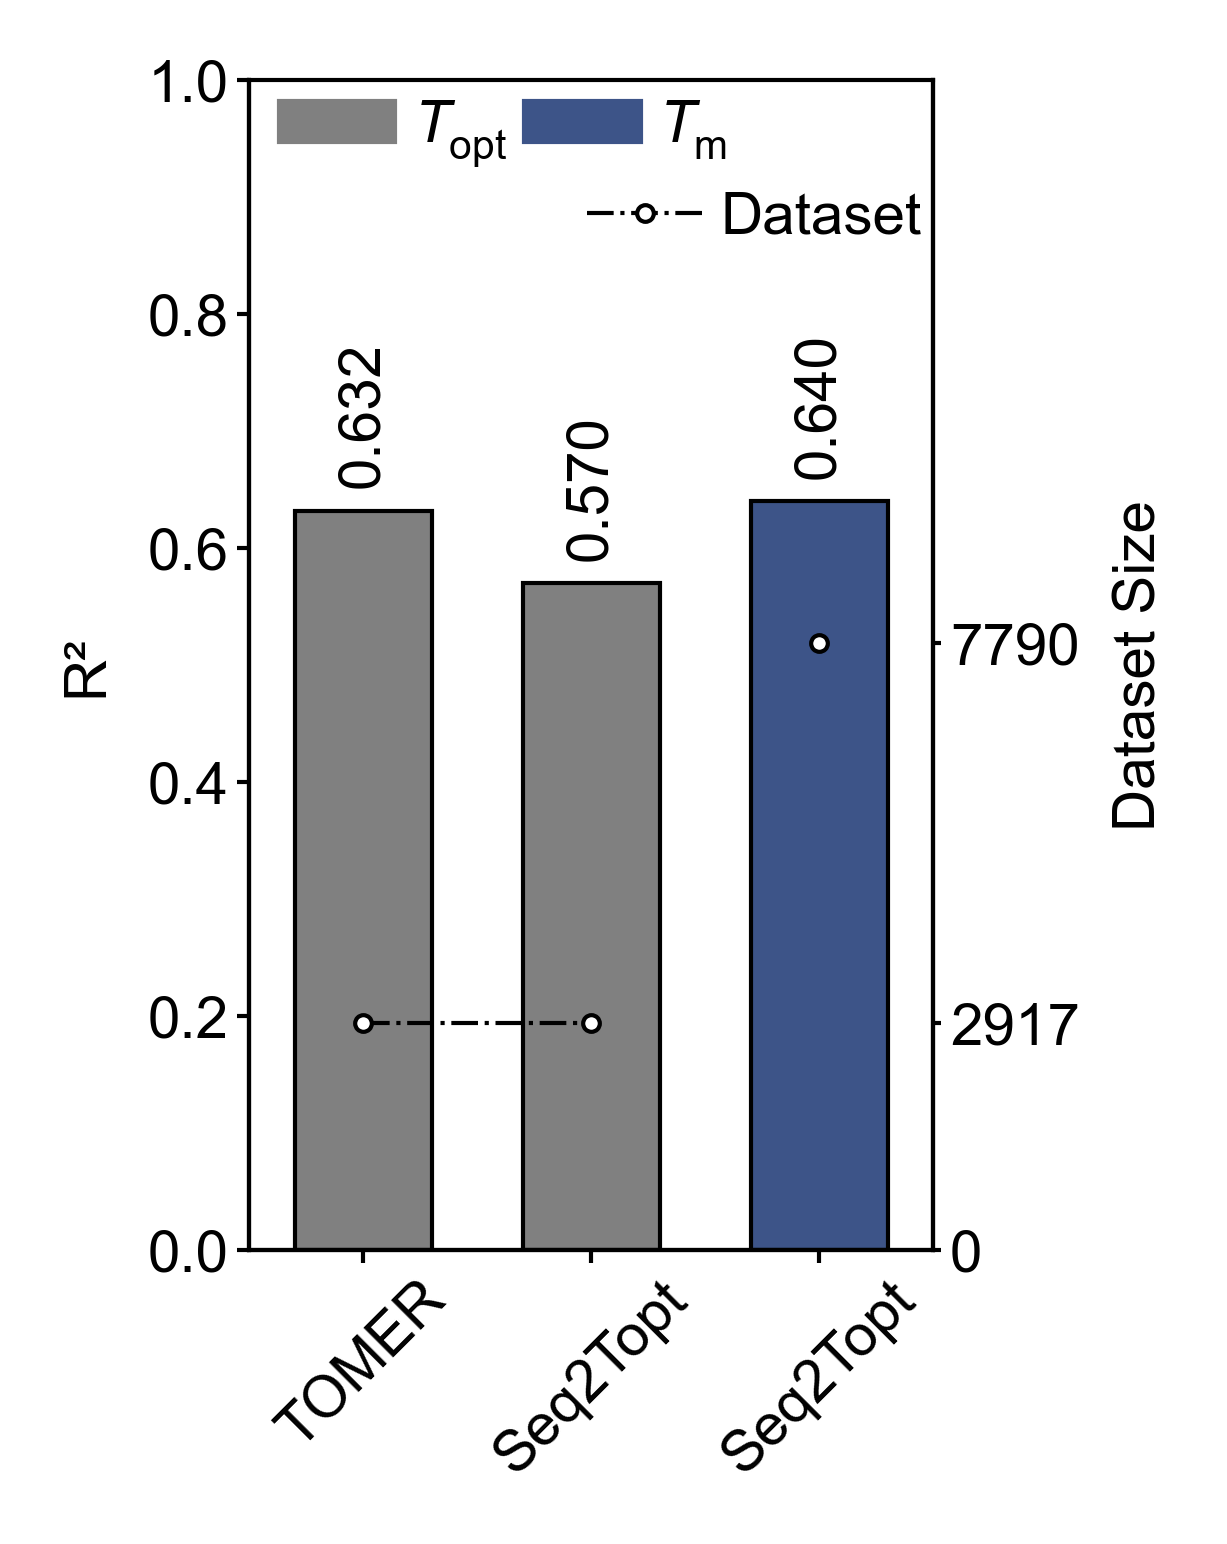

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches

kcat_result_new = {
    'TOMER': {'dataset': 2917, 'R2': 0.632, 'R2_retrain': [0.4314,0.4131,0.4278,0.3538,0.4441]},
    'Seq2Topt(topt)': {'dataset': 2917, 'R2': 0.57, 'R2_retrain': [0.508275,0.445956,0.44652,0.322362,0.430053]},
    'Seq2Topt(tm)': {'dataset': 7790, 'R2': 0.64, 'R2_retrain': [0.78956,0.787954,0.795996,0.795387,0.7956]},
}

data_new = {
    'Model': list(kcat_result_new.keys()),
    'Dataset': [v['dataset'] for v in kcat_result_new.values()],
    'R2': [v['R2'] for v in kcat_result_new.values()],
    'R2_retrain_mean': [np.mean(v['R2_retrain']) for v in kcat_result_new.values()],
    'R2_retrain_std': [np.std(v['R2_retrain']) for v in kcat_result_new.values()]
}
df_new = pd.DataFrame(data_new)
df_new['Model'] = df_new['Model'].apply(lambda x: x.replace('(topt)', ''))
df_new['Model'] = df_new['Model'].apply(lambda x: x.replace('(tm)', ''))

x_pos_new = [0, 1, 2]
colors_new = ['#808080'] * 2 + ['#3D5488']
category_labels_new = ['Other'] * 2 + ['Seq2Topt']

plt.figure(figsize=(1.9, 3), dpi=600)
plt.rcParams.update({
    'font.size': 7,
    'font.family': 'Arial',
    'mathtext.fontset': 'custom',  
    'mathtext.rm': 'Arial',        
    'mathtext.it': 'Arial:italic', 
    'mathtext.bf': 'Arial:bold',   
    'pdf.fonttype': 42,            
    'ps.fonttype': 42
})

plt.gca().spines['top'].set_linewidth(0)
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.gca().spines['left'].set_linewidth(0.5)
plt.gca().spines['right'].set_linewidth(0.5)
plt.subplots_adjust(left=0.2, right=0.8, bottom=0.2, top=0.85)

bars_new = plt.bar(x_pos_new, df_new['R2'], color=colors_new, width=0.6, edgecolor='black', linewidth=0.5, alpha=1)
for bar in bars_new:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.02, f'{yval:.3f}', ha='center', va='bottom', fontsize=7, rotation=90)

plt.tick_params(axis='x', direction='out', width=0.5, which='both', length=1.5, pad=1)
plt.tick_params(axis='y', direction='out', width=0.5, which='both', length=1.5, pad=1)
plt.xticks(x_pos_new, df_new['Model'], fontsize=7, rotation=45, ha='center')
plt.yticks(fontsize=7)
plt.ylabel('R²', fontsize=7)
plt.ylim(0, 1.0)
plt.xlim(-0.5, max(x_pos_new) + 0.5)

patches_new = [
    mpatches.Patch(color='#808080', label=r'$\mathit{T}_\mathrm{opt}$', linewidth=0.5, edgecolor='black'),
    mpatches.Patch(color='#3D5488', label=r'$\mathit{T}_\mathrm{m}$', linewidth=0.5, edgecolor='black'),
]
plt.legend(handles=patches_new, frameon=False, fontsize=7, loc='upper left', bbox_to_anchor=(-0.034, 1.03), ncol=2,
           labelspacing=0.5, handletextpad=0.3, columnspacing=0.3)

ax2_new = plt.twinx()
ax2_new.spines['top'].set_linewidth(0.5)
ax2_new.spines['bottom'].set_linewidth(0.5)
ax2_new.spines['left'].set_linewidth(0.5)
ax2_new.spines['right'].set_linewidth(0.5)
plt.subplots_adjust(left=0.2, right=0.8, bottom=0.2, top=0.85)

ax2_new.plot(x_pos_new[0:2], df_new['Dataset'][0:2], marker='o', color='black', markersize=2, linestyle='-.', linewidth=0.5,
            markerfacecolor='white', markeredgecolor='black', markeredgewidth=0.5, label='Dataset')

ax2_new.plot(x_pos_new[2:3], df_new['Dataset'][2:3], marker='o', color='black', markersize=2, linestyle='-.', linewidth=0.5,
            markerfacecolor='white', markeredgecolor='black', markeredgewidth=0.5)

ax2_new.legend(frameon=False, fontsize=7, loc='upper right', bbox_to_anchor=(1.06, 0.95), labelspacing=0.5, handletextpad=0.3)

ax2_new.tick_params(axis='y', direction='out', width=0.5, which='both', length=1, pad=1)
ax2_new.set_ylabel('Dataset Size', fontsize=7)
ax2_new.set_yticks([0, 2917, 7790])
ax2_new.set_yticklabels(['0', '2917', '7790'], fontsize=7)
ax2_new.set_ylim(0, 15000)

plt.savefig('./pdf/fig1b.pdf', dpi=600)
plt.show()

/tmp/ipykernel_3112172/817624949.py:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  mpatches.Patch(color='#808080', label=r'$\mathit{T}_\mathrm{opt}$', linewidth=0.5, edgecolor='black'),
/tmp/ipykernel_3112172/817624949.py:65: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  mpatches.Patch(color='#3D5488', label=r'$\mathit{T}_\mathrm{m}$', linewidth=0.5, edgecolor='black'),


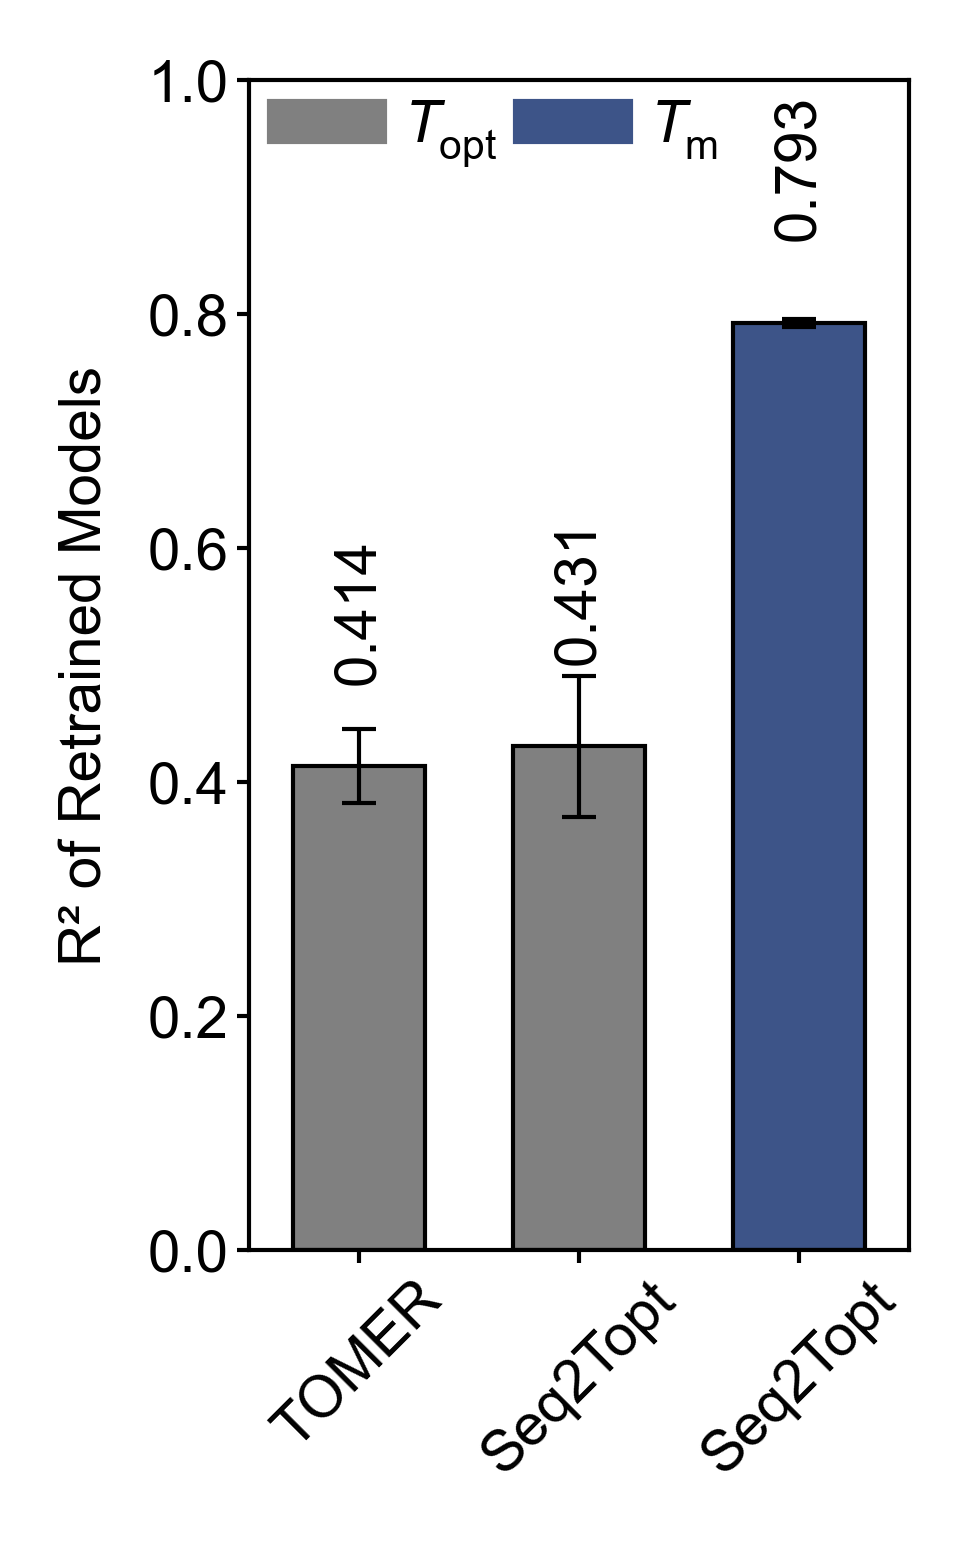

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches

kcat_result_new = {
    'TOMER': {'dataset': 2917, 'R2': 0.632, 'R2_retrain': [0.4314, 0.4131, 0.4278, 0.3538, 0.4441]},
    'Seq2Topt(topt)': {'dataset': 2917, 'R2': 0.57, 'R2_retrain': [0.508275, 0.445956, 0.44652, 0.322362, 0.430053]},
    'Seq2Topt(tm)': {'dataset': 7790, 'R2': 0.64, 'R2_retrain': [0.78956,0.787954,0.795996,0.795387,0.7956]},
}

data_new = {
    'Model': list(kcat_result_new.keys()),
    'Dataset': [v['dataset'] for v in kcat_result_new.values()],
    'R2': [v['R2'] for v in kcat_result_new.values()],
    'R2_retrain_mean': [np.mean(v['R2_retrain']) for v in kcat_result_new.values()],
    'R2_retrain_std': [np.std(v['R2_retrain']) for v in kcat_result_new.values()]
}
df_new = pd.DataFrame(data_new)

df_new['Model'] = df_new['Model'].apply(lambda x: x.replace('(topt)', ''))
df_new['Model'] = df_new['Model'].apply(lambda x: x.replace('(tm)', ''))

x_pos_new = [0, 1, 2]
colors_new = ['#808080'] * 2 + ['#3D5488']
category_labels_new = ['Other'] * 2 + ['Seq2Topt']

plt.figure(figsize=(2, 3), dpi=600)
plt.rcParams.update({
    'font.size': 7,
    'font.family': 'Arial',
    'mathtext.fontset': 'custom',  
    'mathtext.rm': 'Arial',        
    'mathtext.it': 'Arial:italic', 
    'mathtext.bf': 'Arial:bold',   
    'pdf.fonttype': 42,            
    'ps.fonttype': 42
})

plt.gca().spines['top'].set_linewidth(0.5)
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.gca().spines['left'].set_linewidth(0.5)
plt.gca().spines['right'].set_linewidth(0.5)
plt.subplots_adjust(left=0.2, right=0.75, bottom=0.2, top=0.85)

bars_new = plt.bar(x_pos_new, df_new['R2_retrain_mean'], color=colors_new, width=0.6, edgecolor='black', linewidth=0.5, alpha=1)

plt.errorbar(x_pos_new, df_new['R2_retrain_mean'], yerr=df_new['R2_retrain_std'], fmt='none',
             ecolor='black', elinewidth=0.5, capsize=2.0, capthick=0.5)

for bar in bars_new:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.07, f'{yval:.3f}', ha='center', va='bottom', fontsize=7, rotation=90)

plt.tick_params(axis='x', direction='out', width=0.5, which='both', length=1.5, pad=1)
plt.tick_params(axis='y', direction='out', width=0.5, which='both', length=1.5, pad=1)
plt.xticks(x_pos_new, df_new['Model'], fontsize=7, rotation=45, ha='center')
plt.yticks(fontsize=7)
plt.ylabel('R² of Retrained Models', fontsize=7)
plt.ylim(0, 1.0)
plt.xlim(-0.5, max(x_pos_new) + 0.5)

patches_new = [
    mpatches.Patch(color='#808080', label=r'$\mathit{T}_\mathrm{opt}$', linewidth=0.5, edgecolor='black'),
    mpatches.Patch(color='#3D5488', label=r'$\mathit{T}_\mathrm{m}$', linewidth=0.5, edgecolor='black'),
]
plt.legend(handles=patches_new, frameon=False, fontsize=7, loc='upper left', bbox_to_anchor=(-0.05, 1.03), ncol=2,
           labelspacing=0.5, handletextpad=0.3, columnspacing=0.3)

plt.savefig('./pdf/fig1d.pdf', dpi=600, bbox_inches='tight')
plt.show()